In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Read the given CSV file, and view some sample records
dataset = pd.read_csv("/content/drive/MyDrive/TEKDATA/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
# Shape of our dataset
dataset.shape

# Info our dataset
dataset.info()

# Describe our dataset
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


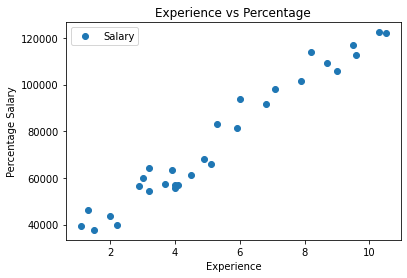

In [7]:
dataset.plot(x='YearsExperience', y='Salary', style='o')
plt.title('Experience vs Percentage')
plt.xlabel('Experience')
plt.ylabel('Percentage Salary')
plt.show()

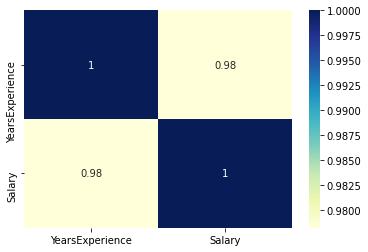

In [11]:
# Visualizing the data using heatmap
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [12]:
# Creating X and y
X = dataset['YearsExperience']
y = dataset['Salary']

In [13]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
# Take a look at the train dataset
X_train
y_train

17     83088.0
22    101302.0
11     55794.0
4      39891.0
29    121872.0
0      39343.0
1      46205.0
18     81363.0
14     61111.0
19     93940.0
21     98273.0
2      37731.0
20     91738.0
10     63218.0
16     66029.0
15     67938.0
23    113812.0
7      54445.0
3      43525.0
24    109431.0
8      64445.0
Name: Salary, dtype: float64

In [15]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [16]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const              25202.887786
YearsExperience     9731.203838
dtype: float64

In [17]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           9.91e-14
Time:                        12:27:44   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387      8.765      0.000    1.92e+04    3.12e+04
YearsExperience  9731.2038    517.993     18.786      0.000    8647.033    1.08e+04
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.106
Skew:                           0.219   Prob(JB):                        0.575
Kurtosis:                       1.964   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

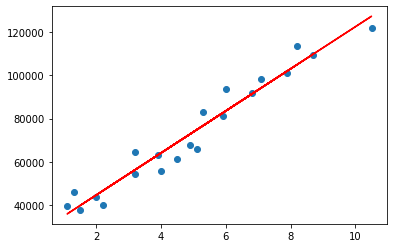

In [18]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 25202.887786 + 9731.203838*X_train, 'r')
plt.show()

In [19]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

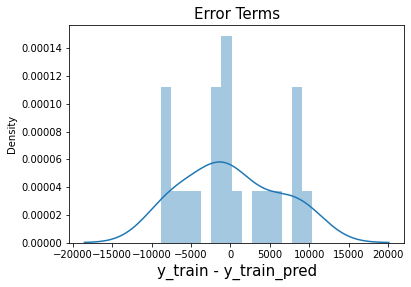

In [20]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

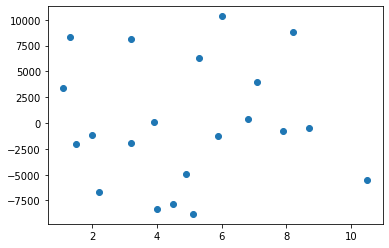

In [21]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [22]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

9      61208.341988
26    117649.324249
28    125434.287320
13     65100.823523
5      53423.378917
12     64127.703139
27    118622.444633
25    112783.722330
6      54396.499301
dtype: float64

In [23]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9627668685473271

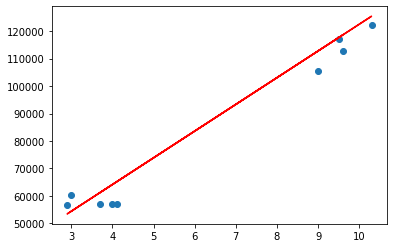

In [24]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [35]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(21, 1)
(9, 1)


In [27]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 25202.887786154883
Slope : [9731.20383825]


In [29]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print('Training Predict:', r2_score(y_train,y_train_pred))
print('Testing Predict:', r2_score(y_test,y_test_pred))

Training Predict: 0.9489148127897334
Testing Predict: 0.9627668685473267


In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
9,57189.0,61208.341988
26,116969.0,117649.324249
28,122391.0,125434.287320
13,57081.0,65100.823523
5,56642.0,53423.378917
12,56957.0,64127.703139
27,112635.0,118622.444633
25,105582.0,112783.722330
6,60150.0,54396.499301


In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 5010.529885004953
Mean Squared Error: 30310299.043402452
Root Mean Squared Error: 5505.479002176146
